# Tutorial 1: Setting up AWS
***

Hello participants! Welcome to the 6th edition of the Global Data Science Challenge - [The Biodiversity Buzz](https://gdsc.ce.capgemini.com/app/about). As we will be working in AWS we have to set up some infrastructure pieces so you can implement your **awesome** ideas! In this tutorial, we will cover:
- setting up AWS SageMaker studio which will be your main tool throughout the competition,
- adding a custom image with preinstalled libraries that are required to finish the rest of the tutorials,
- downloading tutorials and libraries from GitHub,
- learning how to work with AWS SageMaker studio,
- installing lifecycle policies. One will help you with cleaning the trash folder in SageMaker so that you won't incur any additional costs. And the second policy is about setting up the auto-shutdown extension to stop idle instances. This will also be helpful to save on budget during the competition.

Along this tutorial, there is a [video](https://app.frame.io/reviews/9702037a-c4d6-4397-87c8-61db0223561b/4ba24fcf-9397-4c6e-935d-fc5a6a56d529?version=71264242-8424-43ec-992e-b04171d8d20e) in which we are covering all the steps mentioned in this file. 

Since your team only needs to perform the tasks in this tutorial once, only one of your team members needs to go through this tutorial. Please agree with your teammates about who should do the honors! 😄

## Setting up the SageMaker Studio images and kernels

During the challenge, we will be working in [SageMaker Studio](https://aws.amazon.com/sagemaker/studio/). This service provides a managed [JupyterLab](https://jupyter.org/) environment in which we can run our code. To use SageMaker Studio we need to create a SageMaker domain and add a user to this domain (one per team is sufficient). Afterward, we will download the training notebooks and code to the freshly created JupyterLab. To execute the notebooks, there are plenty of dependencies and libraries we need to have installed. To simplify this for you, we prepared a custom Docker image that has everything already installed and set up. We will just need to attach this image to your SageMaker studio domain and you can use it afterward as a kernel in the JupyterLab.

In this section of the tutorial, we will:
- Create a new SageMaker domain,
- Create a new SageMaker user in that domain,
- Attach the custom docker image to the domain, 
- Download the notebooks to SageMaker,
- Start a new notebook with the kernel from our custom docker image.

### Creating SageMaker Domain

To create a SageMaker domain we need to follow a few steps:

1\. First of all, we have to log into our [AWS](https://gdsc22.awsapps.com/start/) account using the credentials you received

2\. After logging into your account you should see a similar console as the one below. Make sure that in the top right corner, you chose **N. Virginia (us-east-1)** as your region.

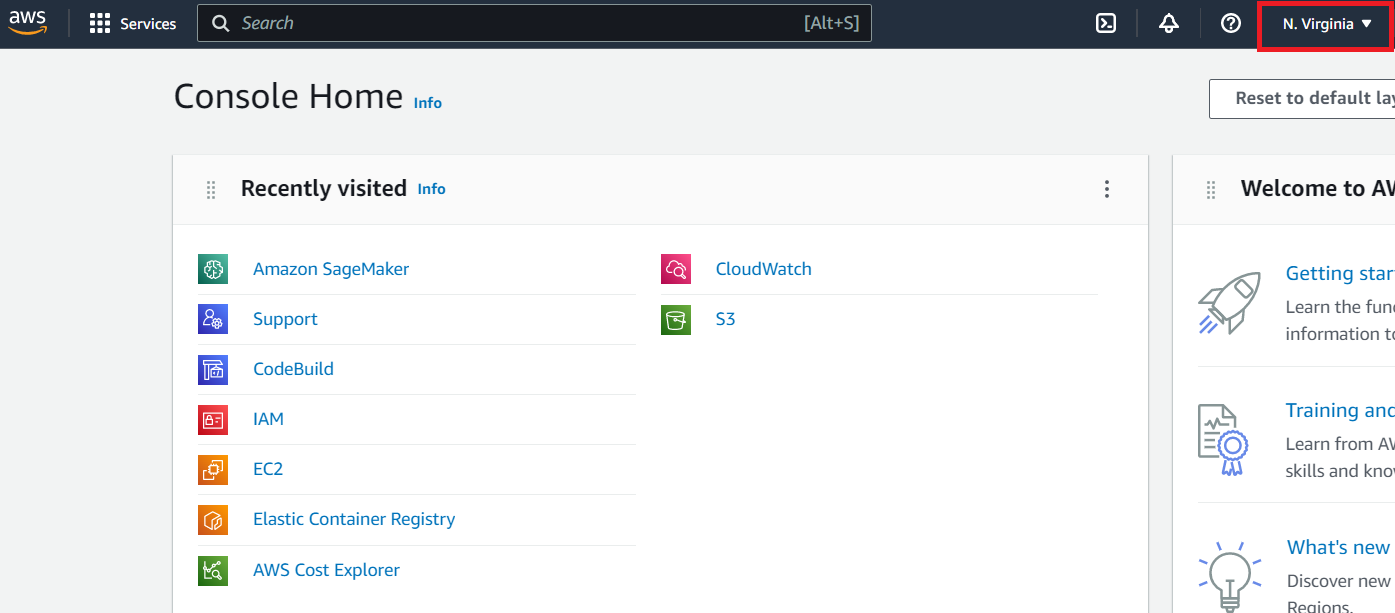

3\. If you are in the correct region you can use the search bar at the top of the screen to look for **SageMaker**

4\. On the left-hand side look for **Domains** and click it, next click the **Create domain** button on the right side. You should see a create domain option just like below:

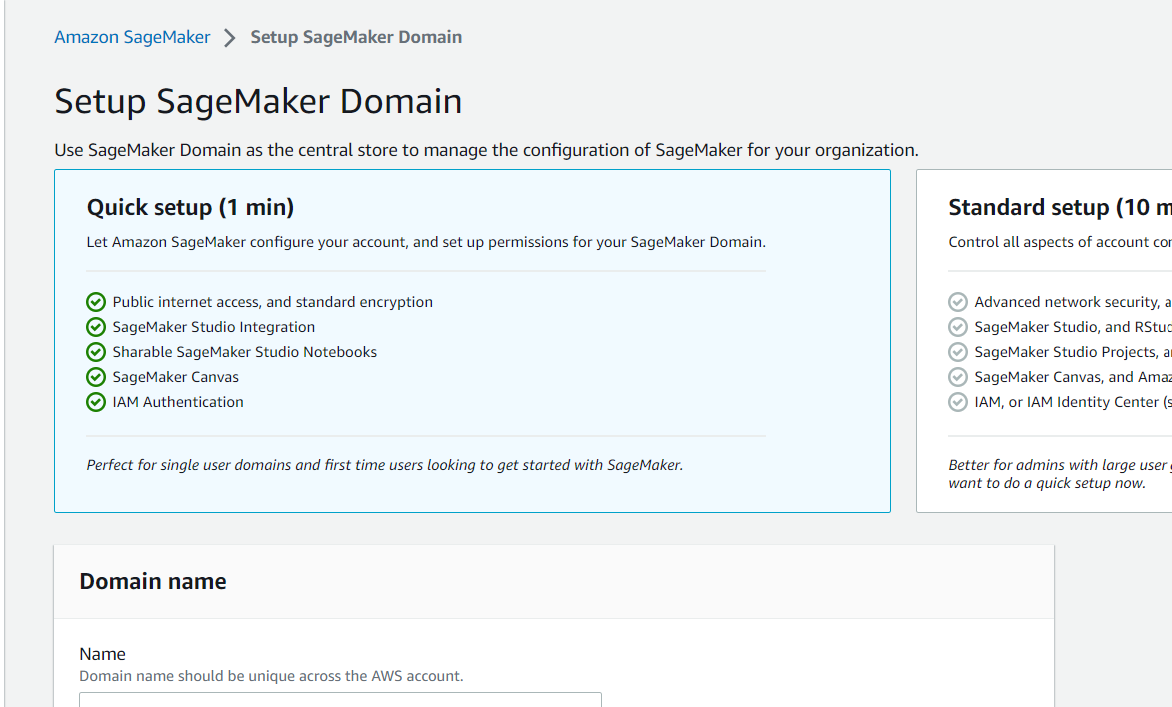

5\. Let's set up our SageMaker domain:
- We can use the default **Quick setup** option
- For the **Domain name** and **User name** put anything you want, just remember: even if there are multiple people in a team you just need one **user** in SageMaker studio! 
- Now we can move on to setting up **Execution role** here we have to create a new role and after clicking that you should see the screen below. Choose *Any S3 bucket* and click *Create role*. After the role is created select it as the **Execution role**.

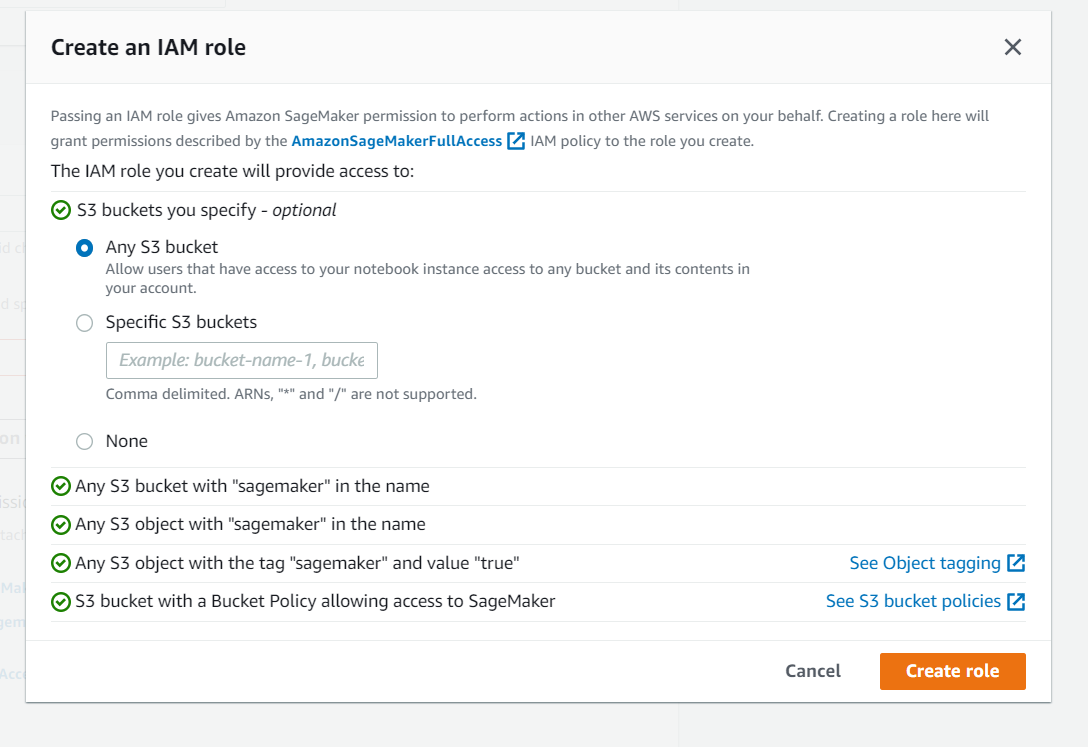

- You can turn off **Enable SageMaker Canvas permissions** as it won't be used during the competition. Let's click **Create domain** and wait a few minutes as it needs some time to be created! 

### Adjusting user Execution Policy

- In the previous step we already created a user for our SageMaker domain but we have to adjust the execution role so it has all the permissions that will be needed throughout the challenge. To do so first click on the domain you created (remember that it might take a few minutes) and next click on the user name within the domain. 

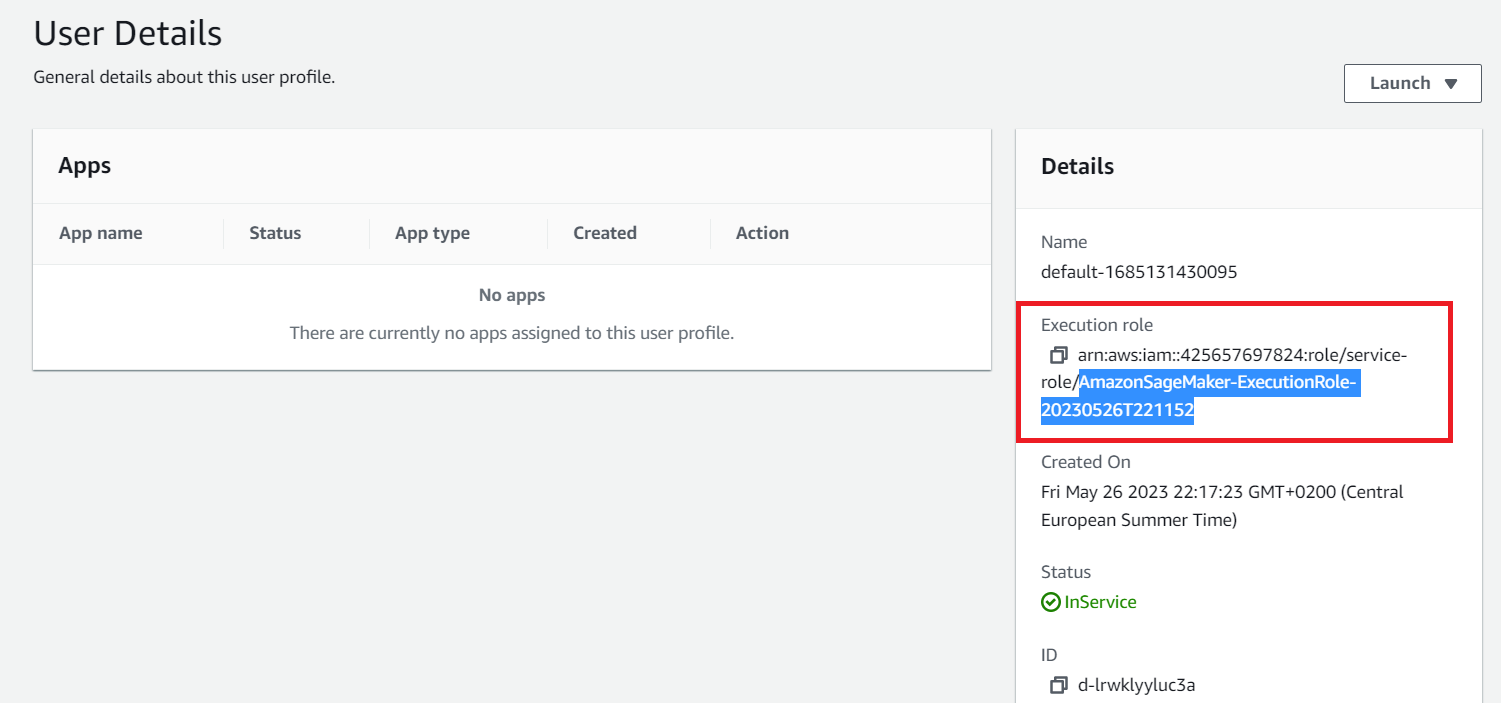


- On the right side you should see all the details about your user and also the **Execution role** which should look similar to this one (with a different time stamp at the end): *AmazonSageMaker-ExecutionRole-20230526T221152*. Copy it and note it down as it will be useful in a moment
- Now we have to open CloudShell which can be found at the top of the page next to the search bar. Click on it and wait as the environment is getting ready

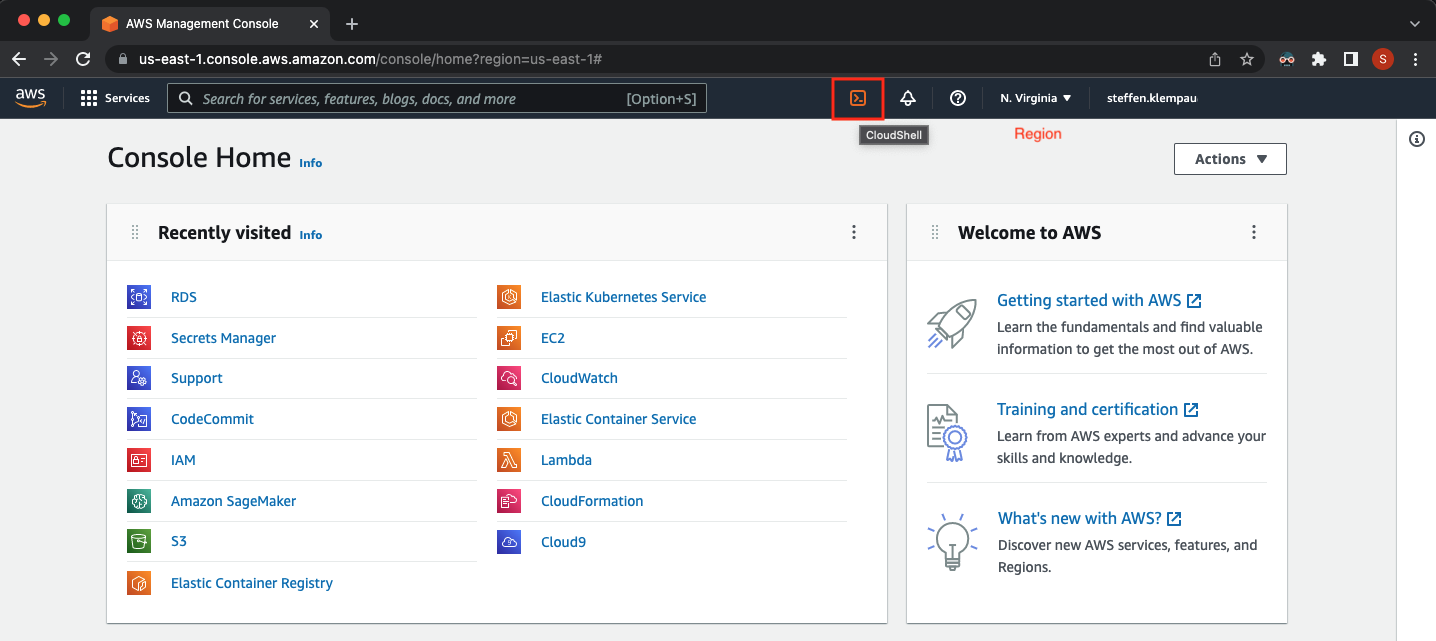

- when the CloudShell is ready we need to pass a few simple commands to adjust our **Execution role**
- first, we need to clone the GitHub repository:
```bash
git clone https://github.com/cg-gdsc/gdsc-policy-adjustment.git
cd gdsc-policy-adjustment
```
- then we use the following command to adjust our SageMaker Execution role. Remember to replace **ROLE-NAME** with your execution role - which we copied a moment ago
```bash
aws iam put-role-policy --role-name ROLE-NAME --policy-name sm-execution-policy --policy-document file://inline-policy.json
```
- that would be it for adjusting the policy. You can close CloudShell now and move on to the next section! 😊

### Attaching Custom Image to our domain

To use custom docker image that we prepared for the challenge you need to follow these steps:
- click on domains on the left side,
- click on the domain name we created in this tutorial and choose **Environment** just like in the screenshot below

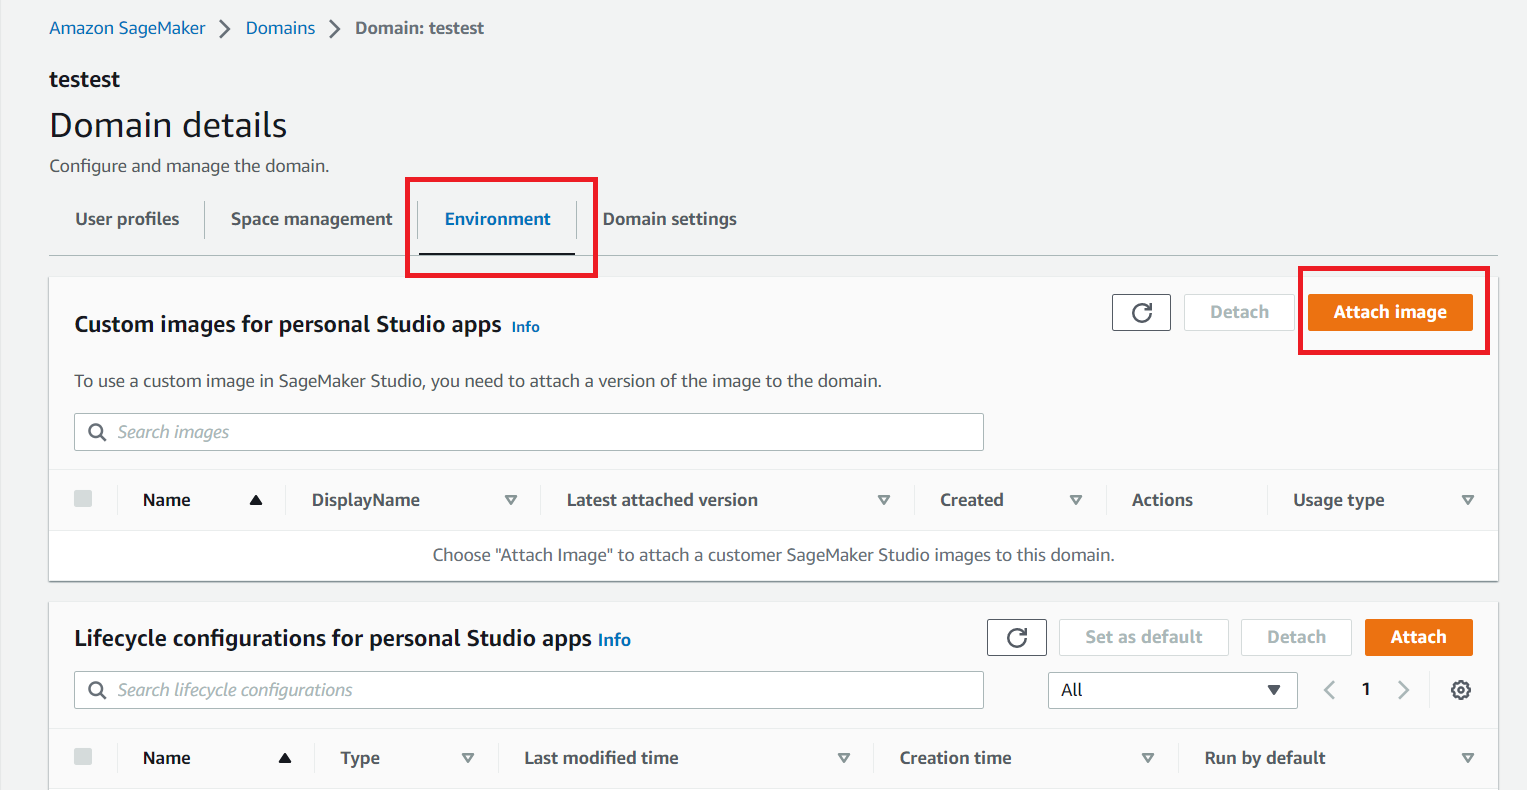

- click on **Attach image** next to *Custom images for personal Studio apps*
- choose **New image** and enter an ECR image URI:
```954362353459.dkr.ecr.us-east-1.amazonaws.com/sm-training-custom:latest```
- click next and fill out the form accordingly:

| Image properties | Description |
| :--------- | ----------- |
|Image name| custom-gdsc|
|Image display name| gdsc|
|Description| Custom image for GDSC 6|
|IAM role| AmazonSageMaker-ExecutionRole-… (the one copied about)|
|EFS mount path| /root/data|
|Advanced configuration| User ID: 0|
|Advanced configuration| Group ID: 0|
|Select an image type below| SageMaker Studio Image|
|Kernel name| python3|
|Kernel display name| GDSC|

- If you filled up the form click **Submit** at the bottom and the image will be attached in a few minutes. Please remember that it's really important to use the settings shared above when creating the image. If you change something you might run into errors when working in SageMaker studio.

When the image is attached we can launch our studio. To do so click on your domain and next to the user click on **Launch** and click on **Studio**. Now we just have to wait! 

### Clone the notebooks into Sagemaker Studio

When our studio is ready you should see a welcome screen similar to this one:

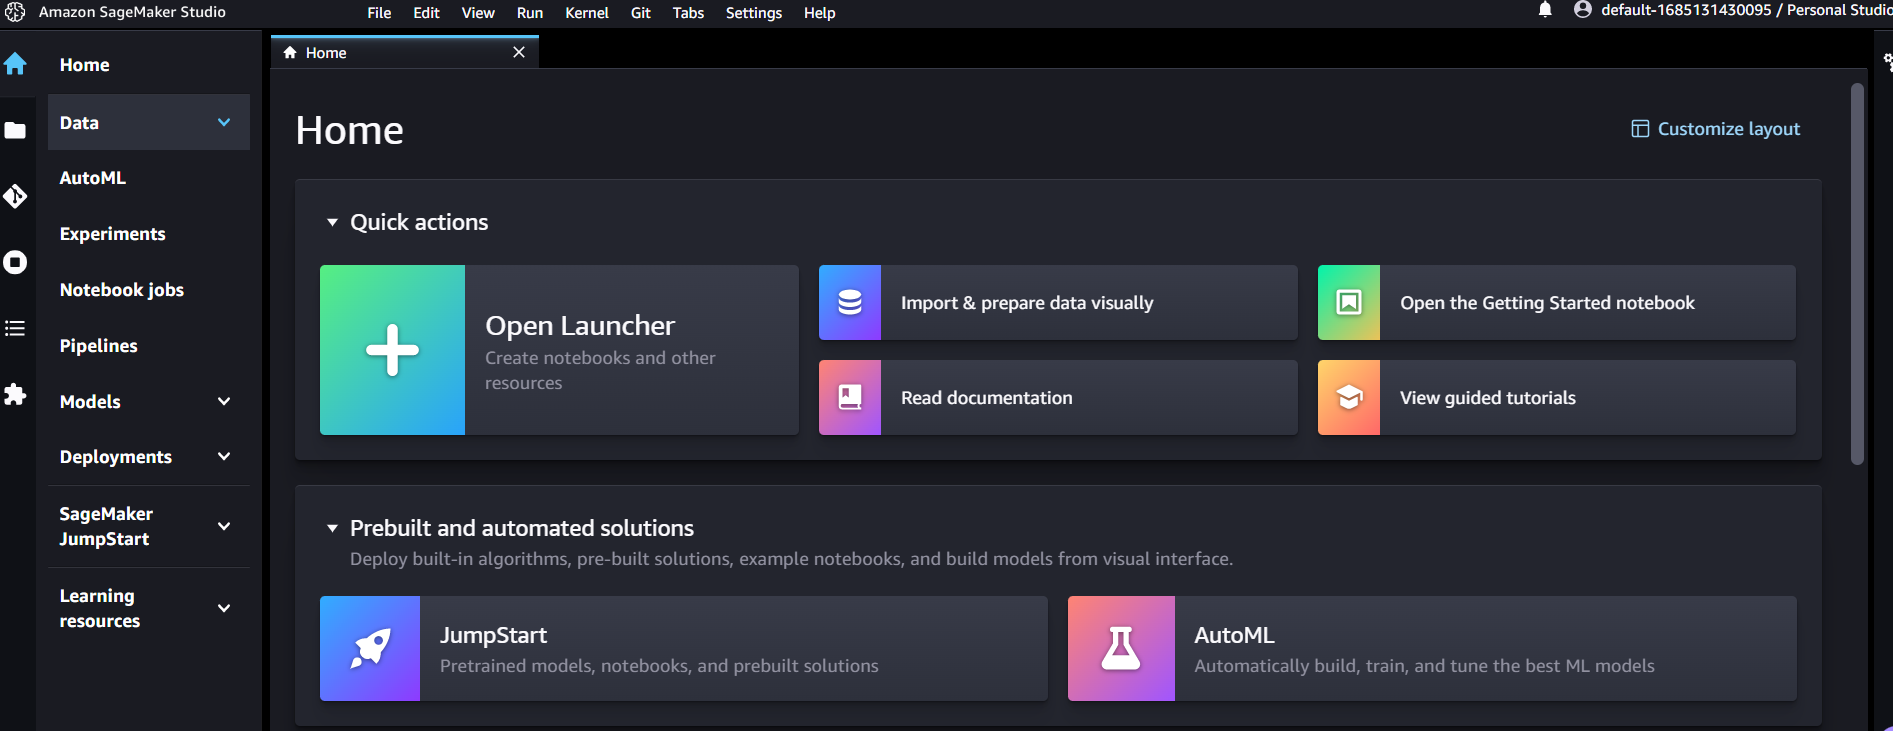

- on the left side bar click the git icon (3rd from the top) and next click **Clone a Repository**. Next pass this link:

```https://github.com/cg-gdsc/GDSC-6.git```  

and click **Clone**

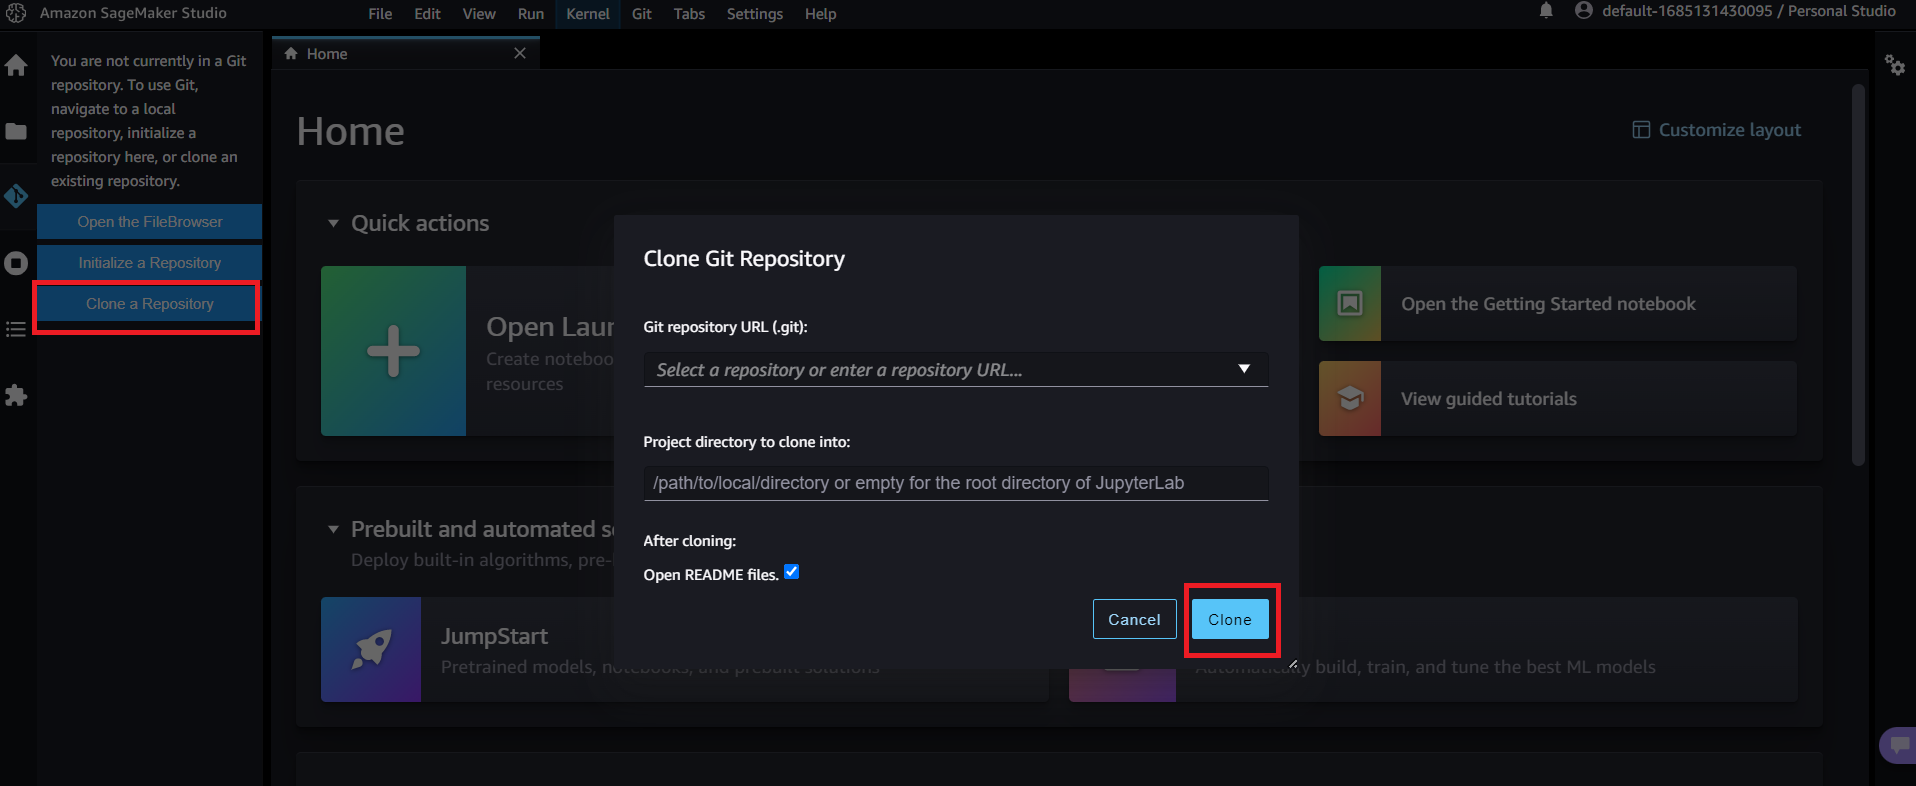

- when all the files are downloaded you should see a new folder called **GDSC-6**
- it will be much easier if the content of this folder will be moved to our *root directory* to do so double click on the folder, mark all the files within this folder then use right click and **cut**. Now we can move back to our root directory and after using right click use **paste**. 
- you can delete **GDSC-6** folder as it's an empty folder now that won't be useful during the competition

Great! Now we have all the files we need for the competition

### Starting new notebook with our custom image

Our Sagemaker Studio is now ready for development. In this part, we want to show you how to work with the Studio environment. In particular, we will learn how to:

* Open a new/existing notebook and start a Jupyter kernel,
* Change to another kernel,
* Change the instance type of our notebook, and
* Stop an instance.

First, we will learn how to open a Jupyter Notebook. You can either start a new notebook from the launcher or by just opening one from the file system (little folder icon in the left pane) by clicking on it. As this is straightforward, we will only show you how to create a new one from the launcher. 
- So first of all from your **Home** screen click on **Open launcher**

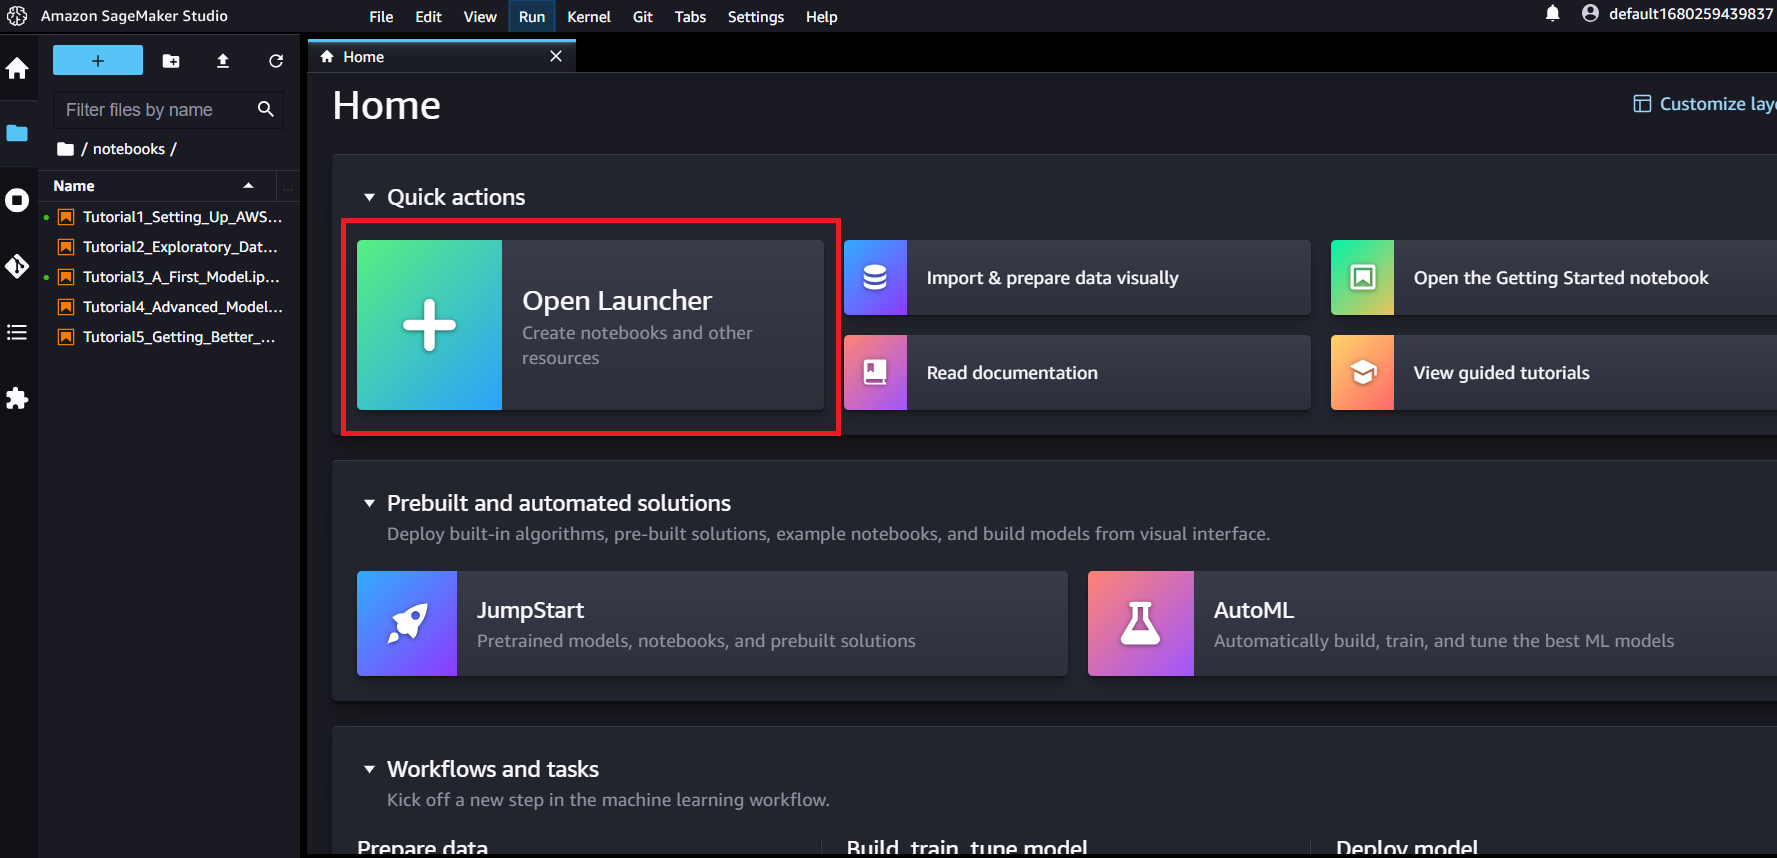

- Now you should see a similar view to the one presented below. Let's click on **Change environment** to choose our custom image

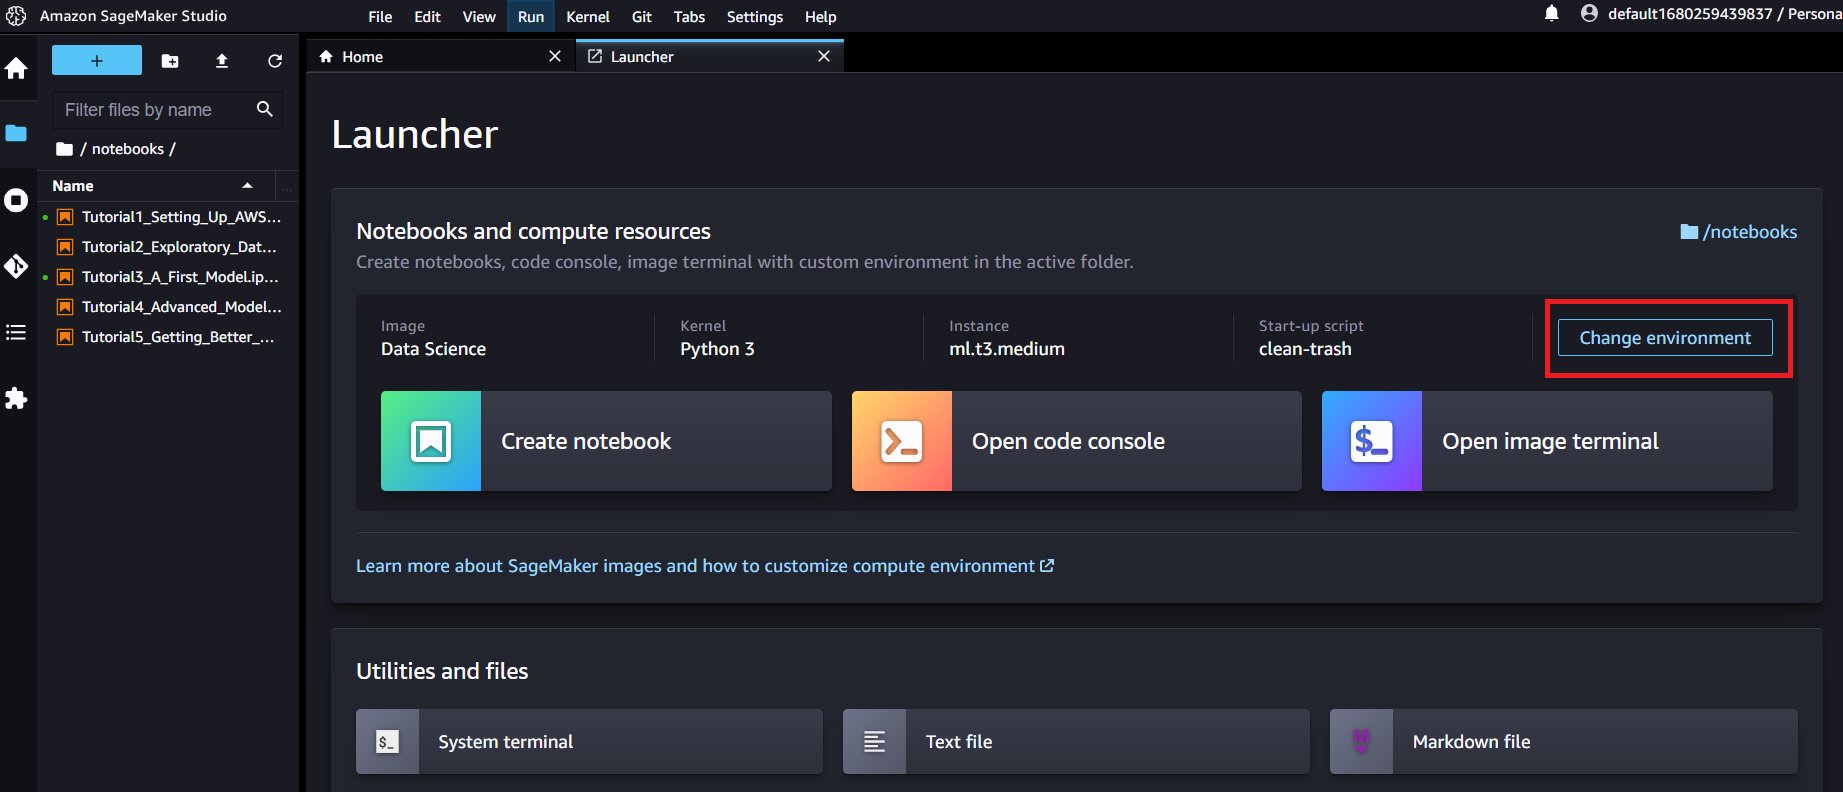

- In the **Change environment** settings let's change our image to the one that we attached a few steps ago. We need to change it to **custom-gdsc** just like in the screenshot. 

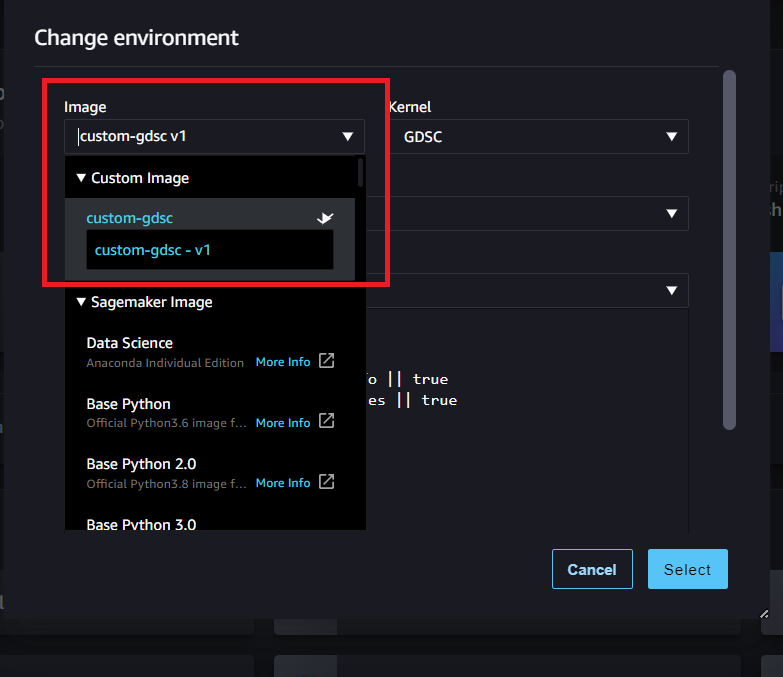

- As for the instance we can stick to *ml.t3.medium* for most of the time. Remember that we pay for every minute that the instance is on and the bigger the instance the higher the price. After setting up the image and instance we can click on **Create notebook**

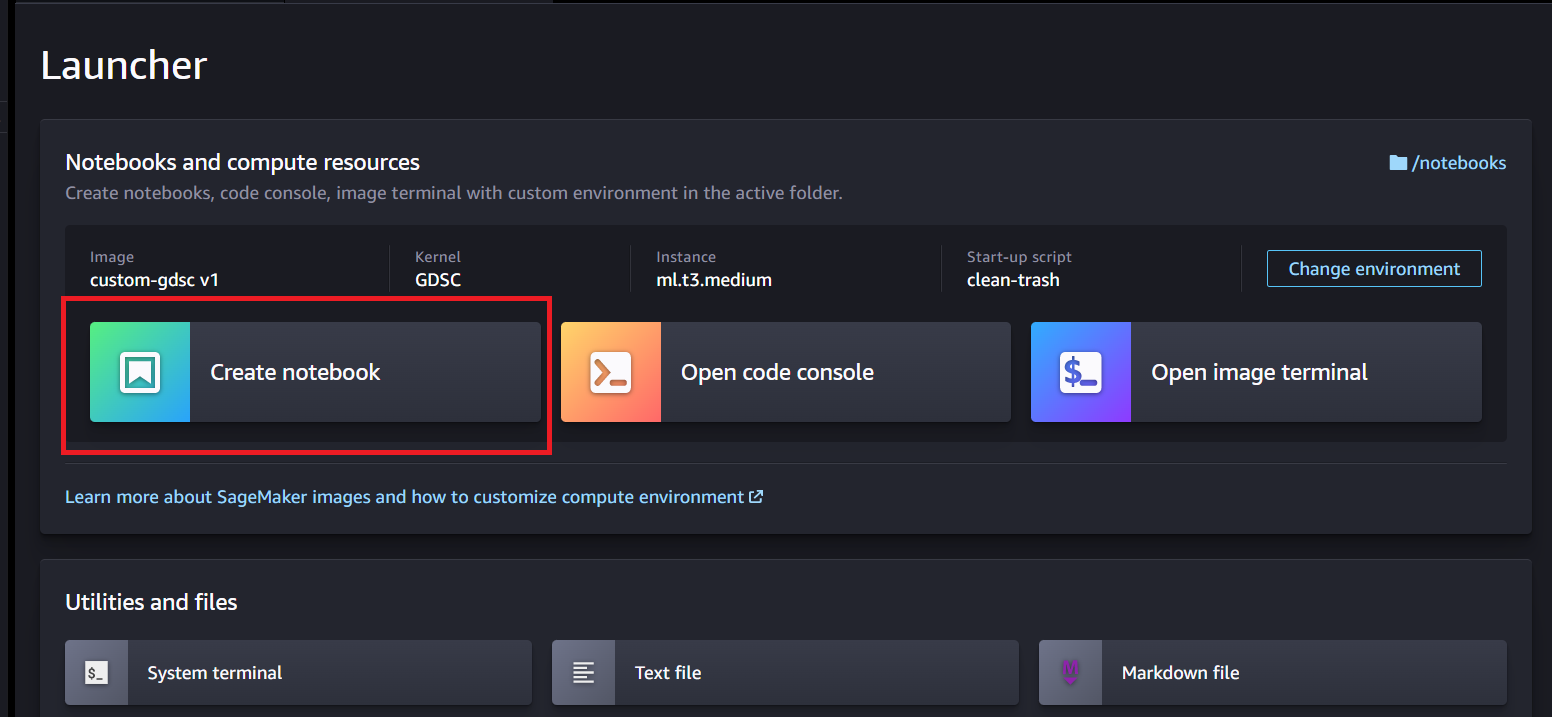

- Now a new notebook should open. Well done! If you want to change the instance you can click on the **Notebook environment** in the top right corner choose the one you are interested in and click **Select**

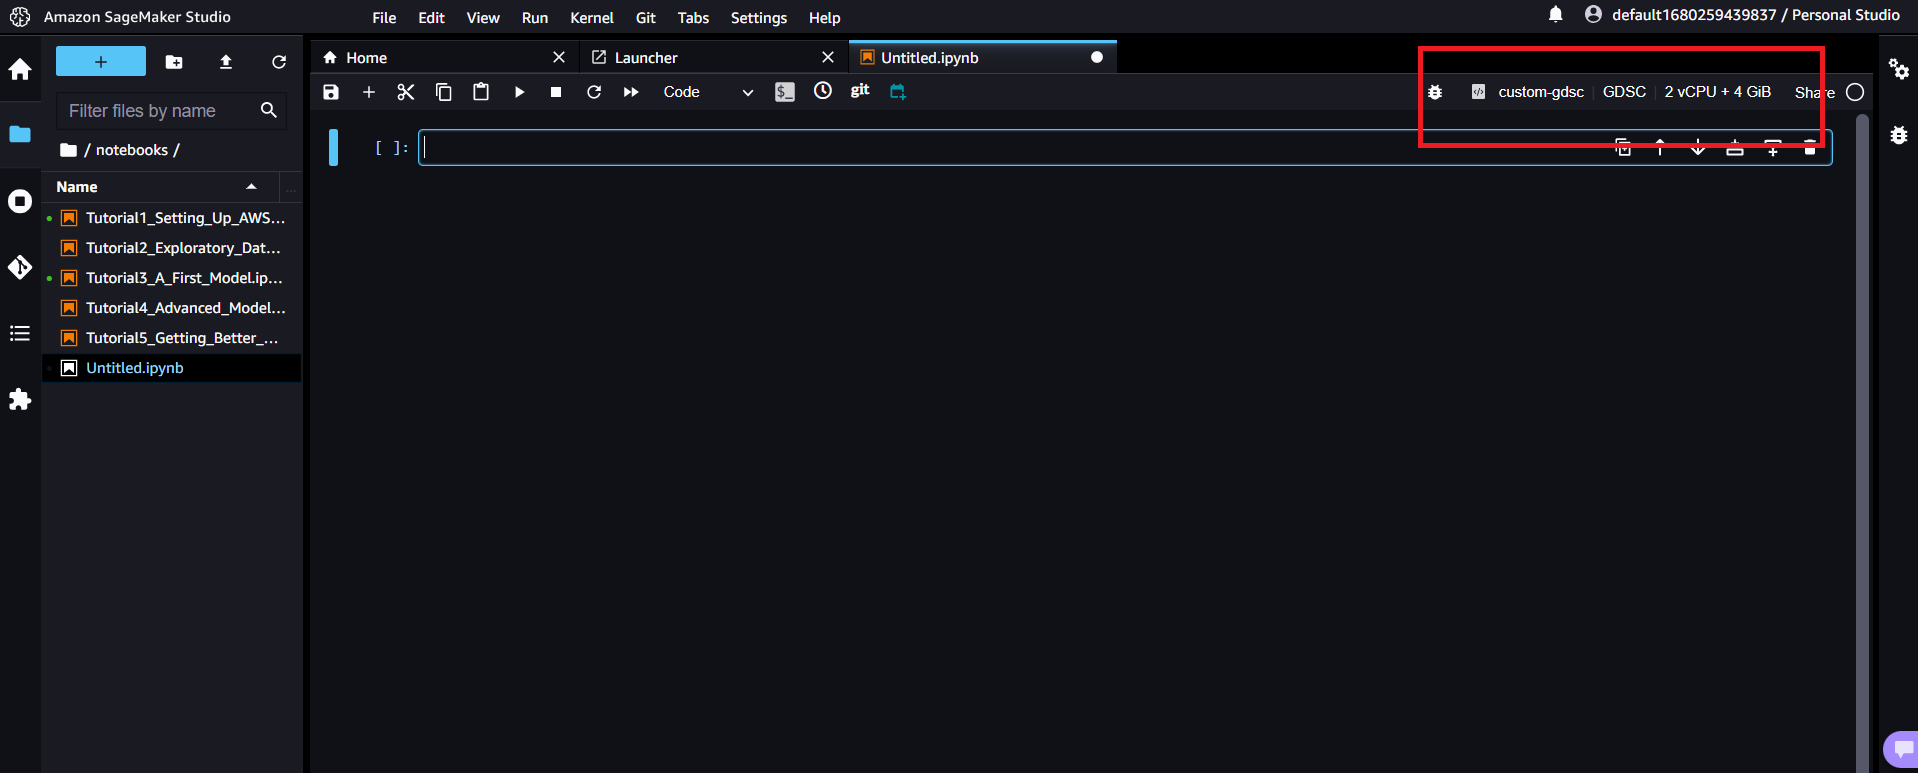

- One more thing you need to know is how to stop a running instance. For example, after you switched the instance you will need to stop the other one to save costs. Additionally, mother earth deserves it! To do this, click on the resource section on the left panel in Sagemaker Studio and find the instance in the first section "Running instances". Click the on/off button next to the instance name to stop an instance and accept the pop-up with "Shutdown all". In case you clicked accidentally, you can restart it afterward again after some time.

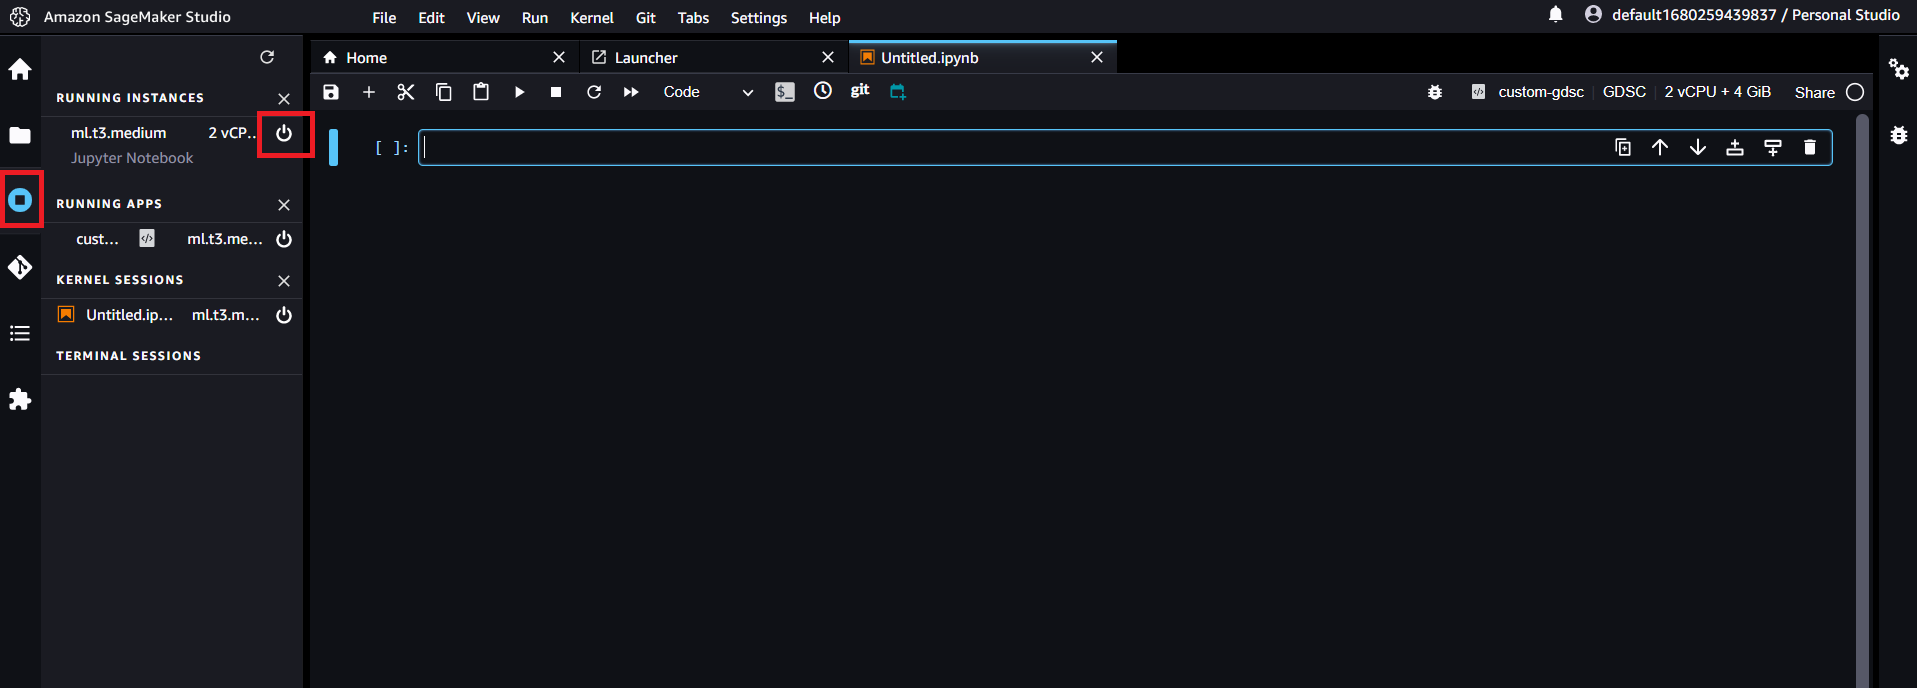

## Setting up lifecycle policy

In this step, we want to add two extensions that will help you saving costs. If you didn't notice yet, there is a *shell_scripts* folder in your directory with 2 files we want to use.

### Adding a clean-trash policy

We noticed that every file you delete in SageMaker studio is moved to a hidden *trash* folder. As we are paying for the storage we decided to create a *lifecycle policy* which will clear this folder every time you start a new SageMaker session. To set it up click on the top: **file -> new -> terminal**

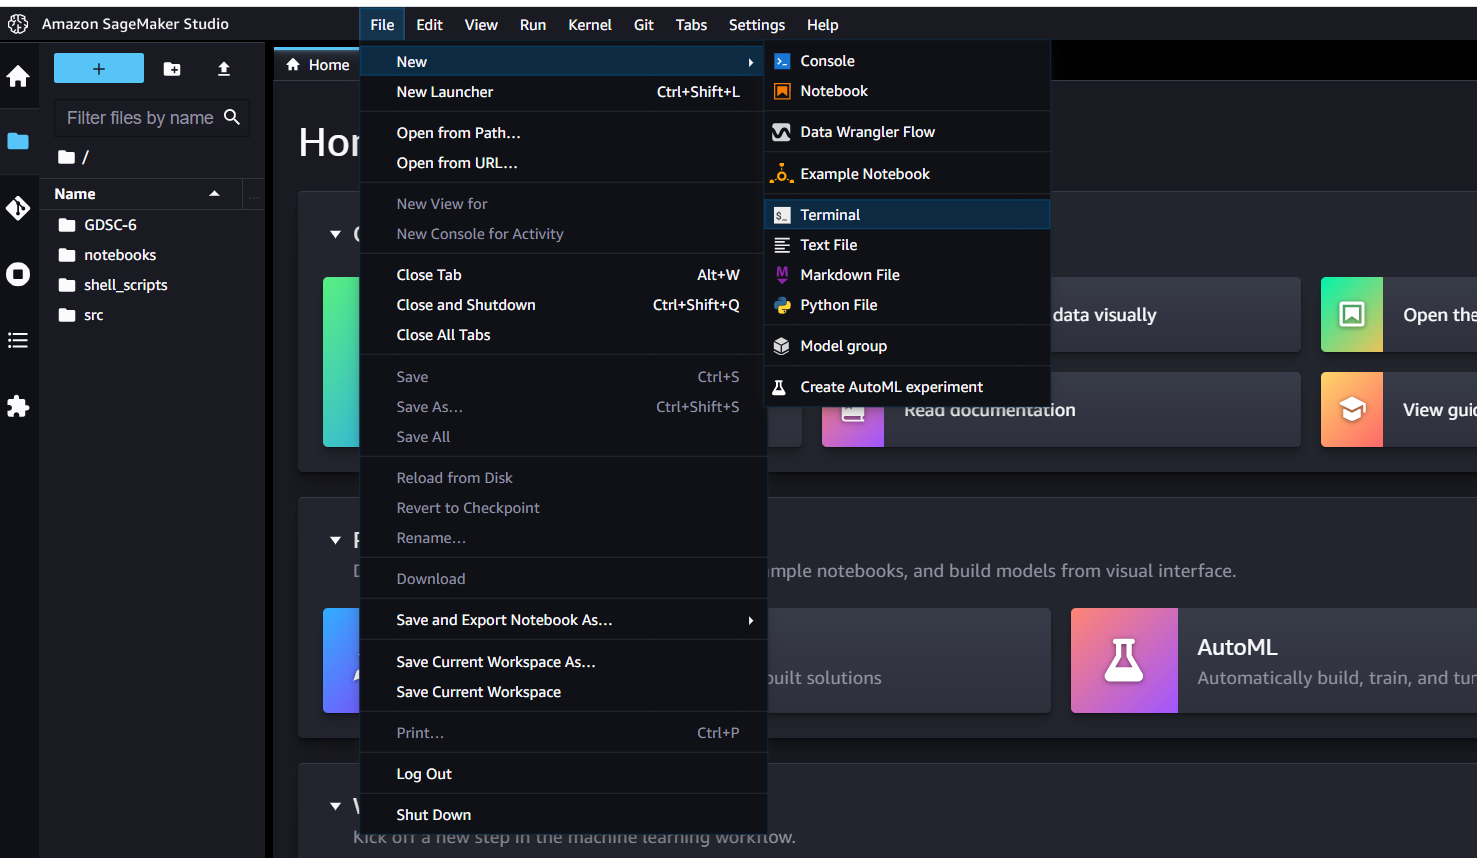

In the terminal we need to pass this command:
```bash
cd shell_scripts
LCC_CONTENT=`openssl base64 -A -in clean-trash.sh`
aws sagemaker create-studio-lifecycle-config \
    --region us-east-1 \
    --studio-lifecycle-config-name clean-trash \
    --studio-lifecycle-config-content $LCC_CONTENT \
    --studio-lifecycle-config-app-type KernelGateway
```

### Adding auto-shutdown extension

It's really important to shut down all your instances when you finished your work, but of course, everyone can forget it. Now we will install an extension that will automatically shut down instances that are not used for 2 hours. If you want to change the idle time go to **shell_scripts -> on-jupyter-server-start.sh** and in the 14th line change **TIMEOUT_IN_MINS** to the value you want to use. After changing the value save the file and close it. Now let's go back to our terminal and paste this command:

```bash
cd shell_scripts
LCC_CONTENT=`openssl base64 -A -in on-jupyter-server-start.sh`  #

aws sagemaker create-studio-lifecycle-config \
    --studio-lifecycle-config-name install-autoshutdown-extension \
    --studio-lifecycle-config-content $LCC_CONTENT \
    --studio-lifecycle-config-app-type JupyterServer
```
**Done!**

- when we run this script we have to go back to SageMaker domains environment settings:

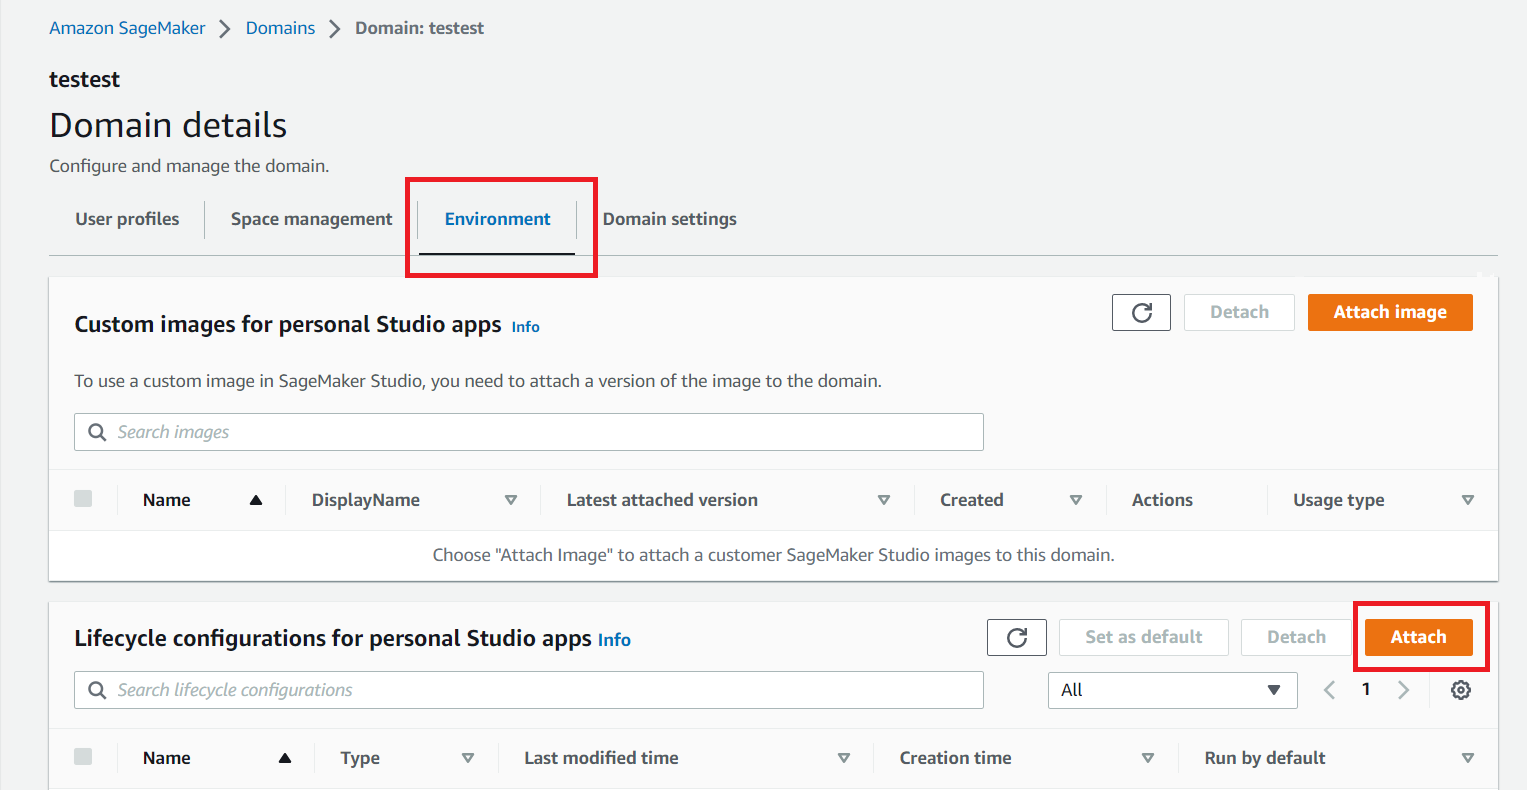

- next to *Lifecycle configurations for personal Studio apps* click **Attach**
- choose *Existing configuration* and at the bottom of the settings you should see the newly created lifecycle policy called **clean-trash** and **install-autoshutdown-extension**. Choose both of them and click **Attach to domain**

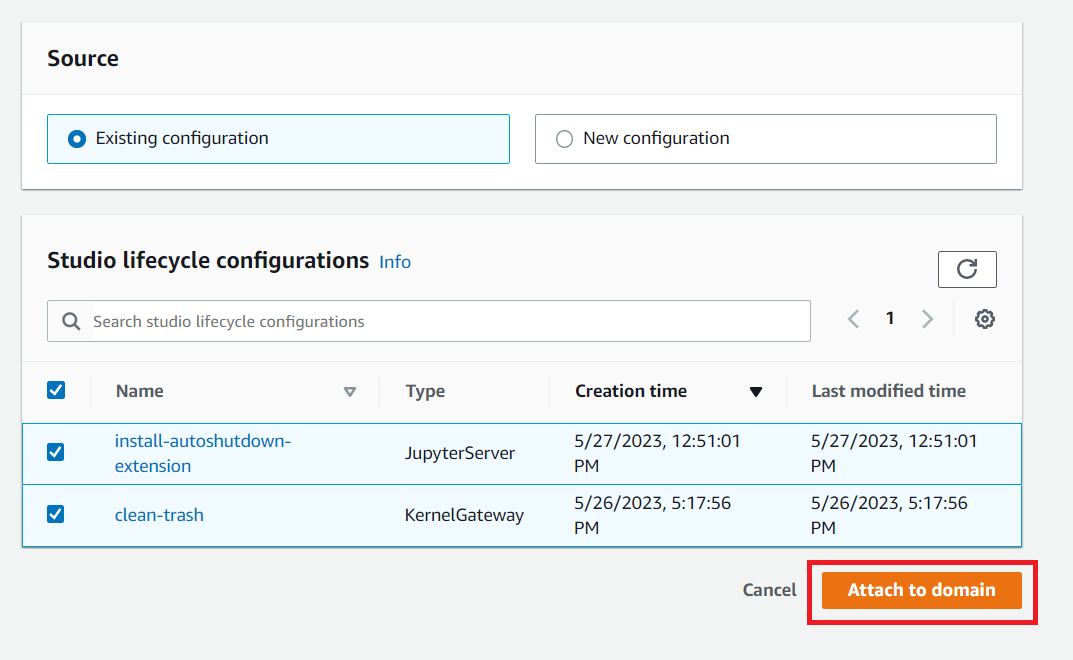

- it might take a moment to attach the policies, but when it's ready scroll down to *Lifecycle configurations for personal Studio apps* tick the newly attached policies and click **Set as default** you have to do it separately for both policies.

**Clean-trash**

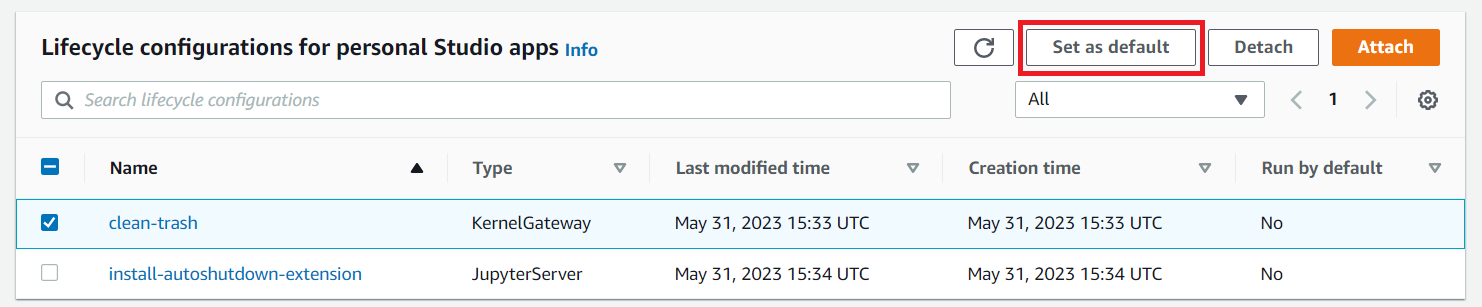

**Auto-shutdown**

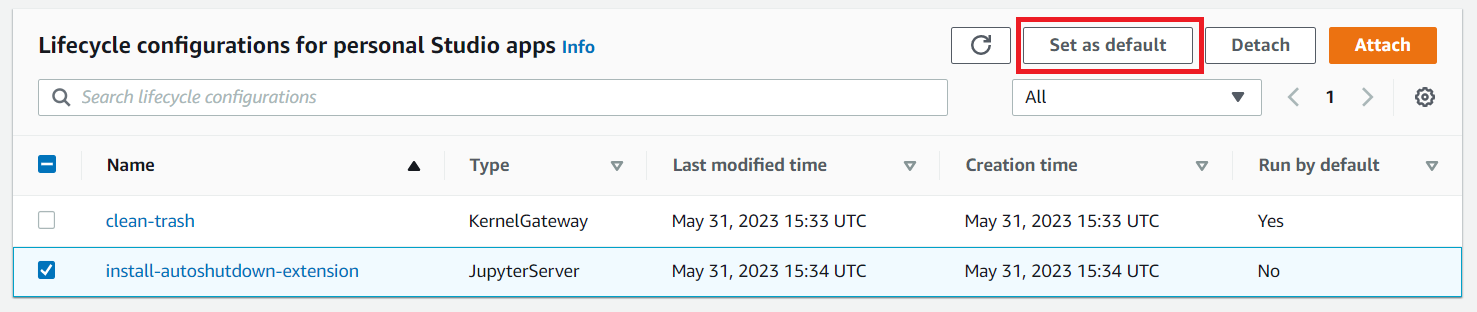

Great! Now whenever you start a new instance it will automatically clear storage by deleting files from the trash and if you by accident leave an idle instance working it will shut it down after 2 hours - but still please remember to turn off your instances if you are not using them! 

**You are helping to save costs and carbon emissions - well done** 🌎✨

### Shutting down SageMaker studio

Each time you finish your work in SageMaker studio it is very important to turn off all the instances. To do so you need to follow these steps:

- Click on **file** and at the bottom of the menu click on **Shut down**

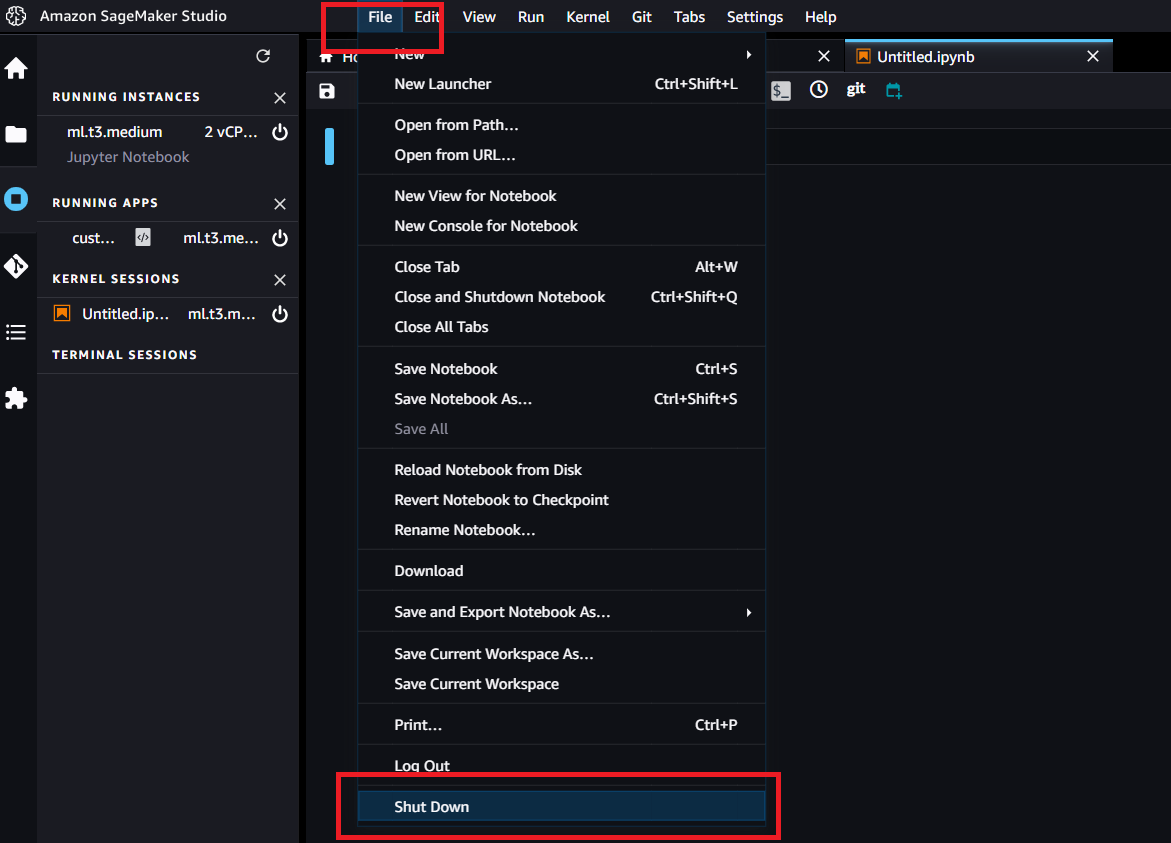

- Next you should see the below **Shutdown confirmation** go ahead and click on **Shutdown all**

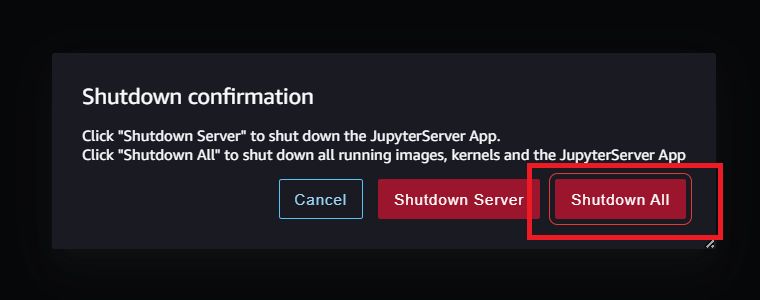

- The SageMaker studio will be completely shut down shortly.

## Summary

In this tutorial, we have set up all the necessary resources to participate in the GDSC. Now, your team is ready to take part in this exiting challenge. We hope that everything in this tutorial went fine and that you will have a lots of fun in the course of the challenge. If anything didn't work out as expected, we recommend one last time taking a look at the [Video](https://video.toadd) for this tutorial. 

All right, thats it! ✅ 

You can now jump to Tutorial 2: Exploratory Data Analysis. You will find it in the notebooks folder in your Sagemaker Studio filesystem. Have fun!


